# Data Clearning and Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
drive.mount('/content/drive/', force_remount=True)
source_data = pd.read_csv('train.csv')

Mounted at /content/drive/


In [ ]:
source_data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [ ]:
#check invalid Nan values
source_data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
#Check data type
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
#drop unuseful data
source_data.drop(['ID','Customer_ID','SSN','Name'], axis = 1, inplace = True)

In [ ]:
#data after drop
source_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

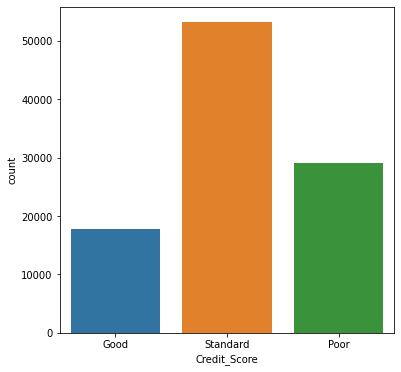

In [ ]:
#check distribution of credit score
plt.figure(figsize=(6,6))
sns.countplot(x = 'Credit_Score', data = source_data)

In [ ]:
#number of credit scores
source_data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

Data is moderate imbalance, we need to use some methods to sampleing data instead of random sampleing

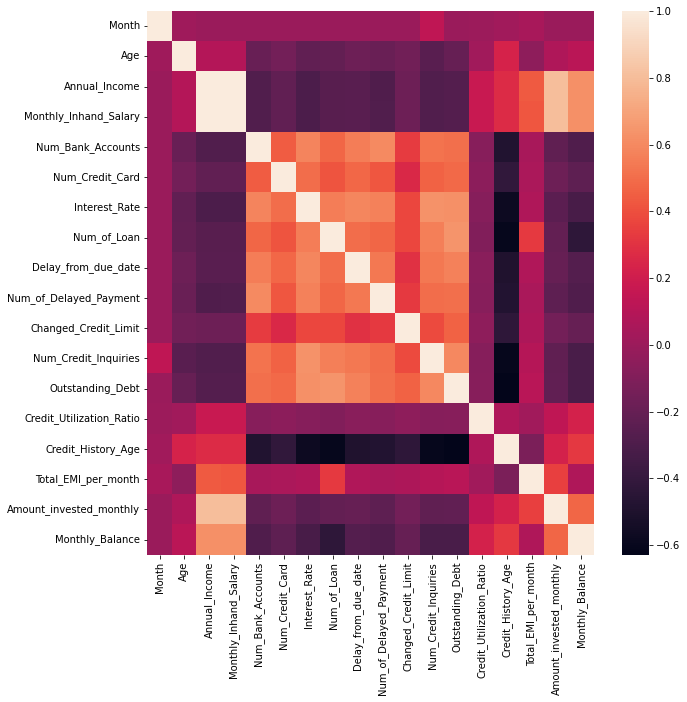

In [ ]:
#correlation


plt.figure(figsize=(10,10))
sns.heatmap(source_data.corr())
#most of numerical data are not strong correlated.

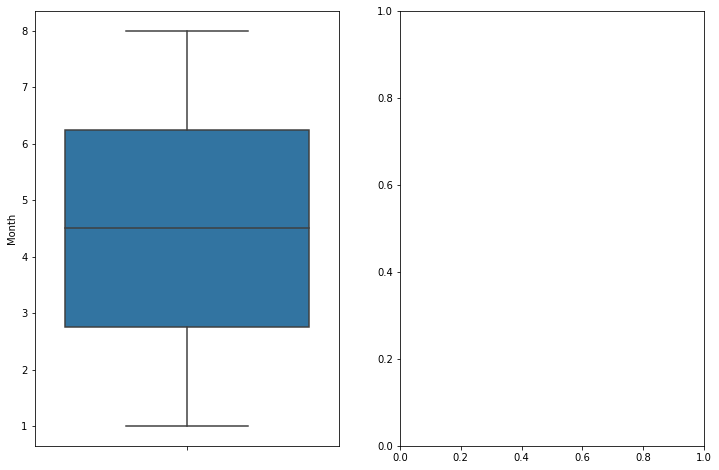

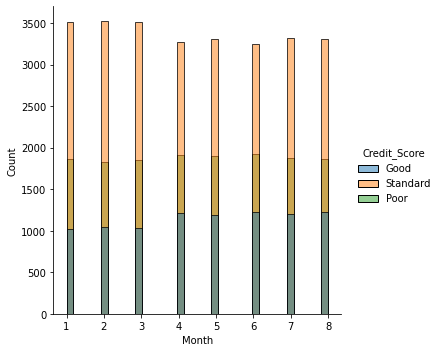

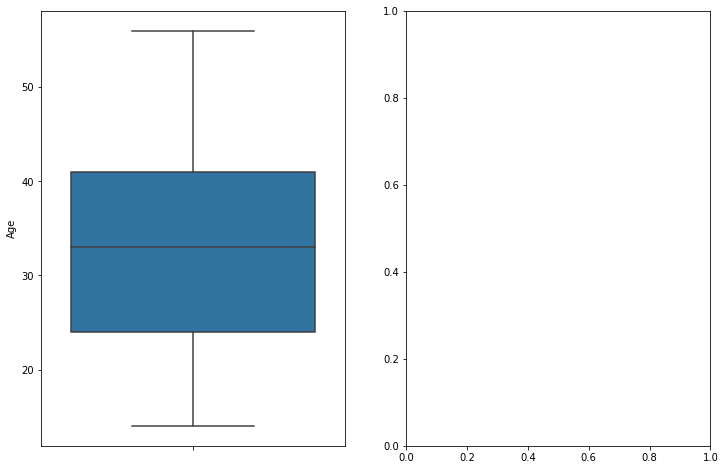

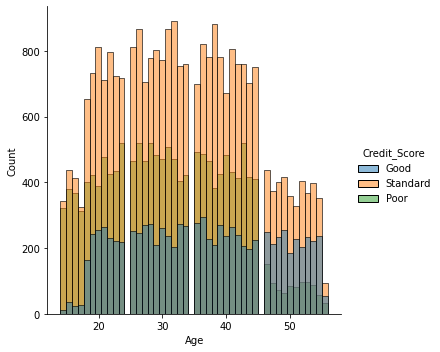

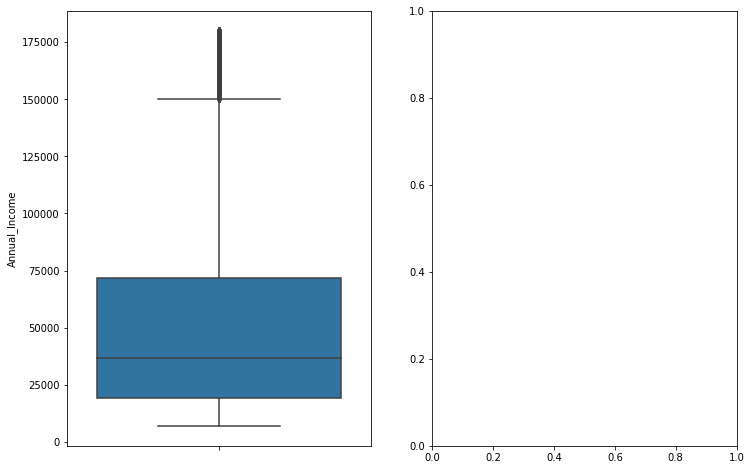

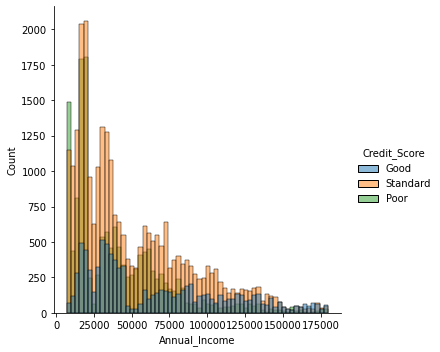

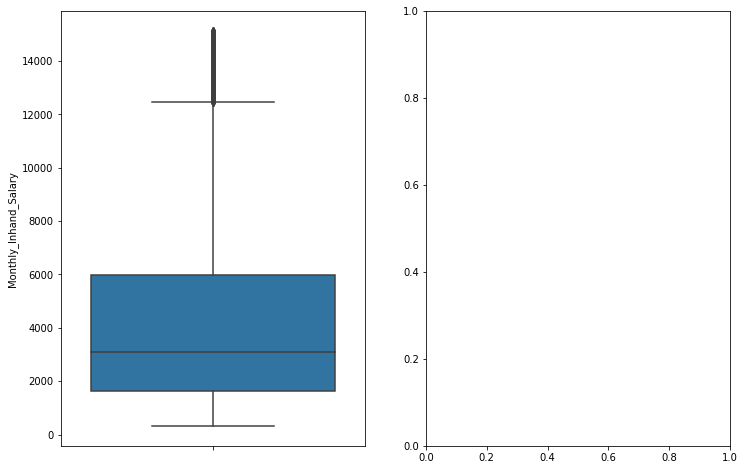

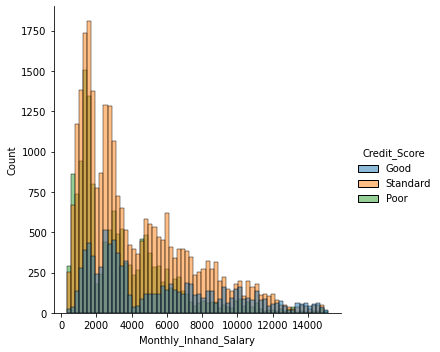

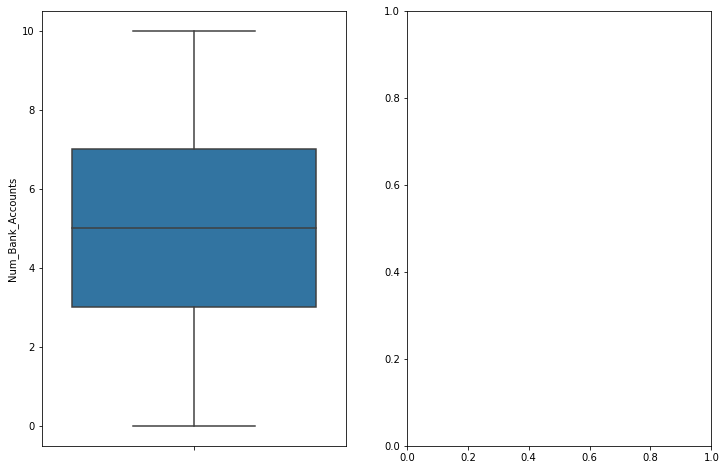

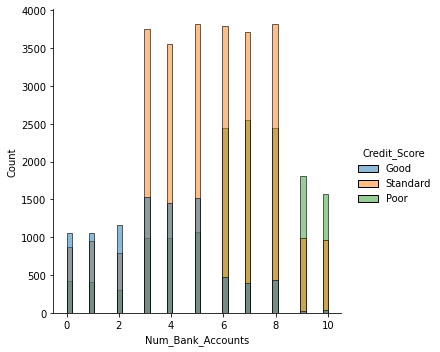

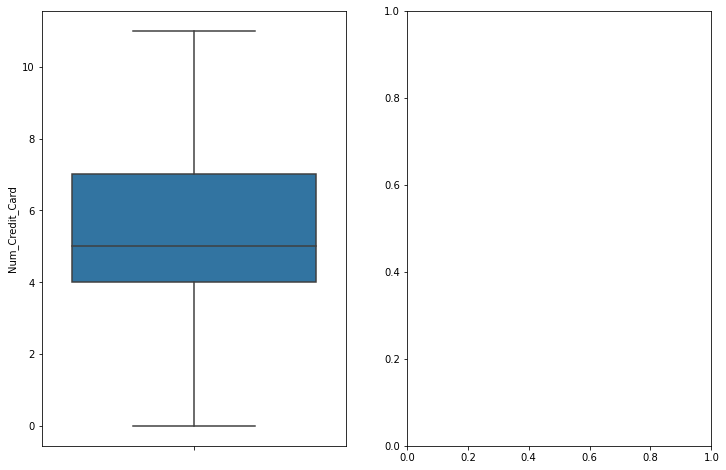

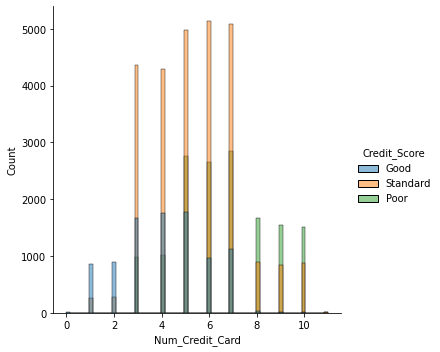

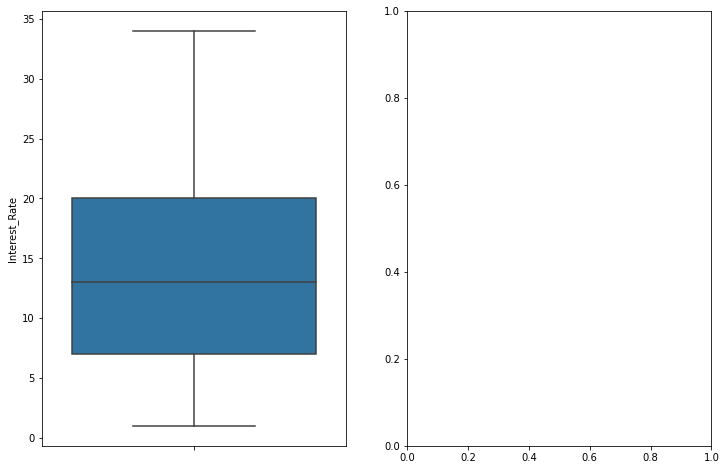

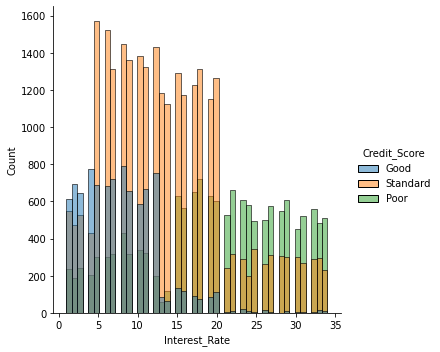

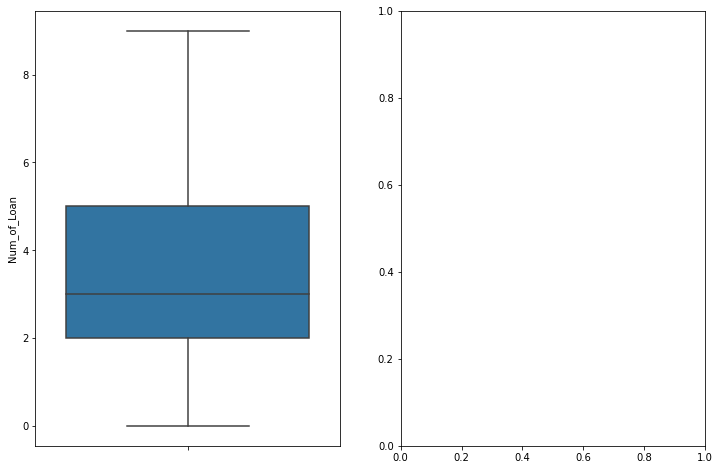

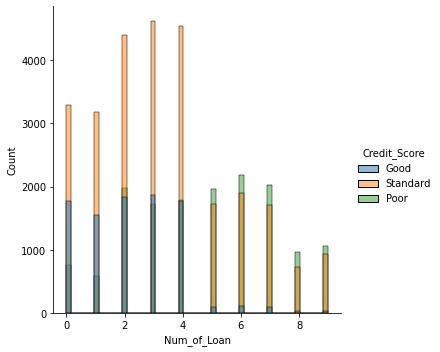

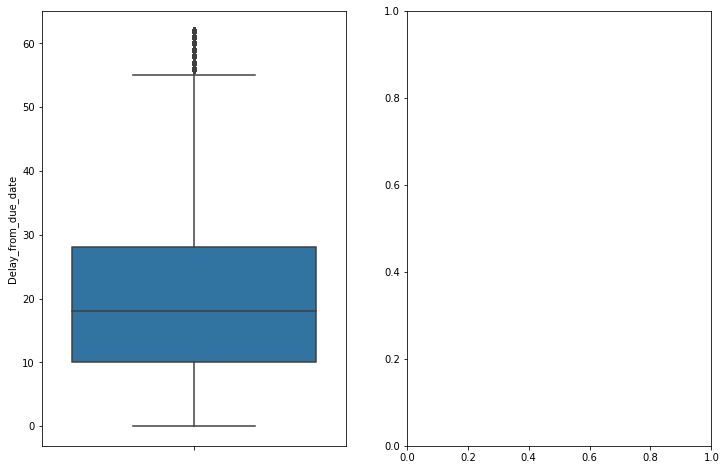

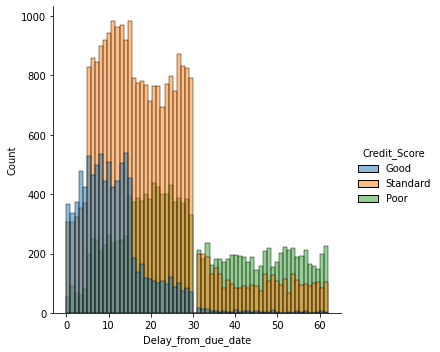

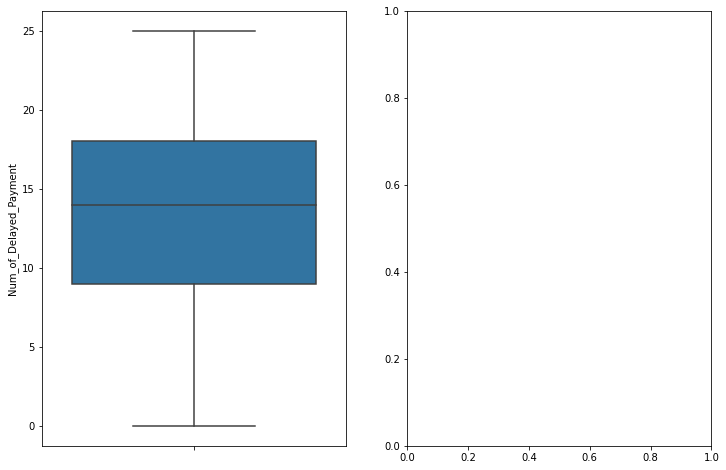

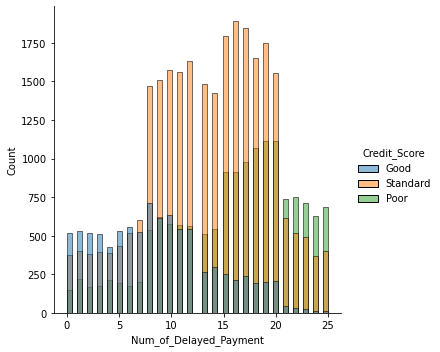

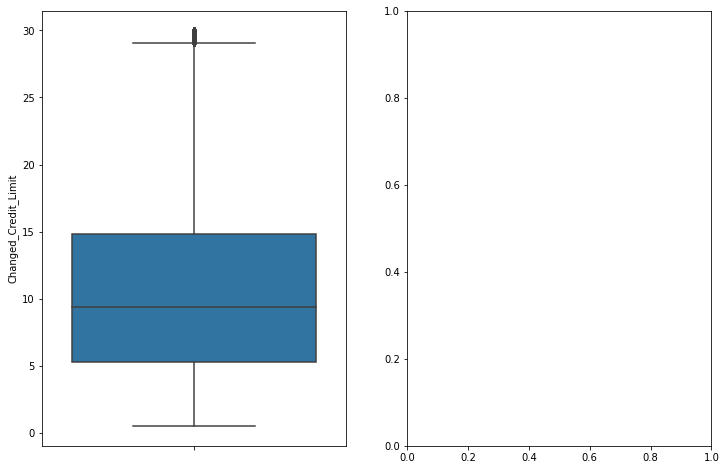

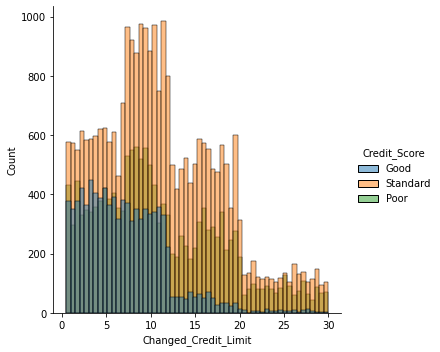

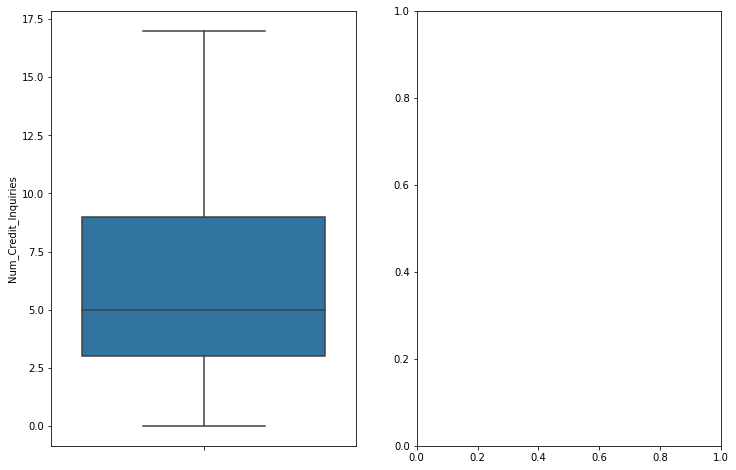

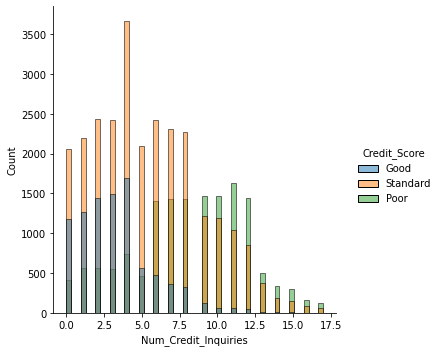

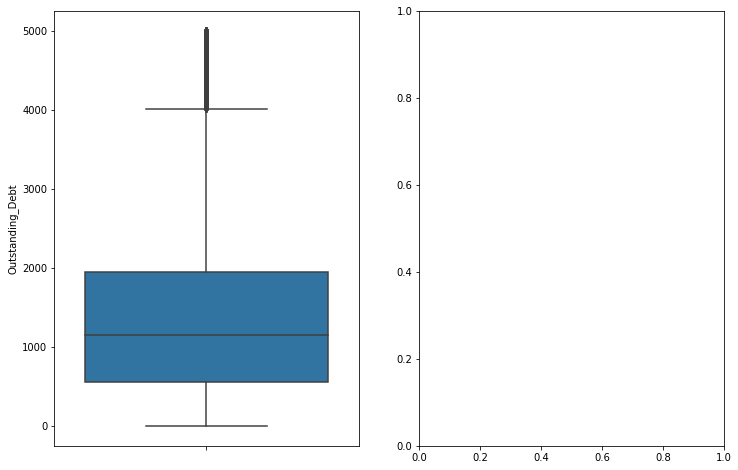

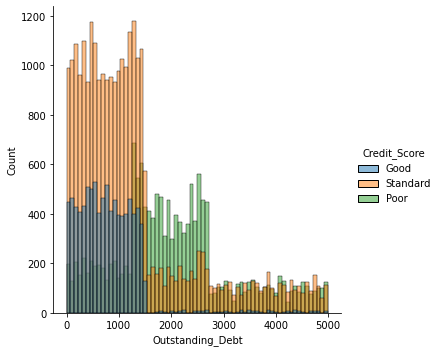

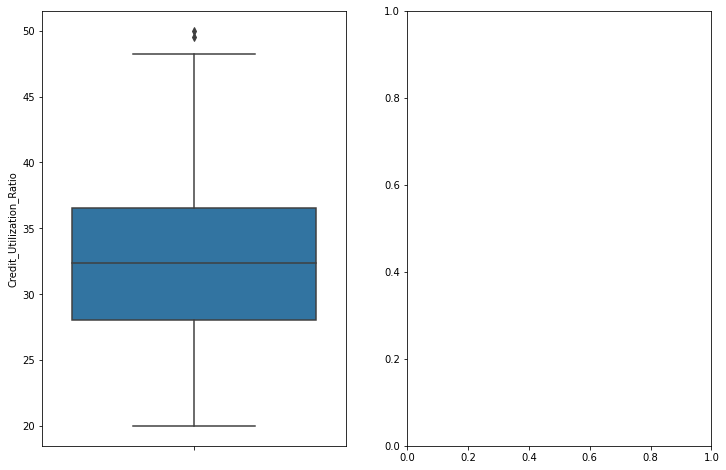

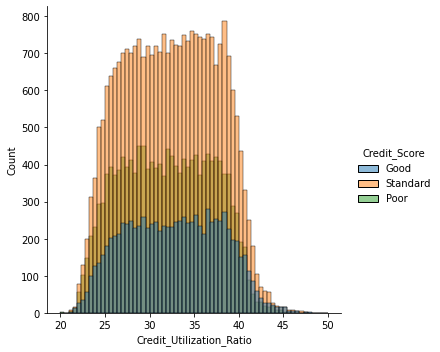

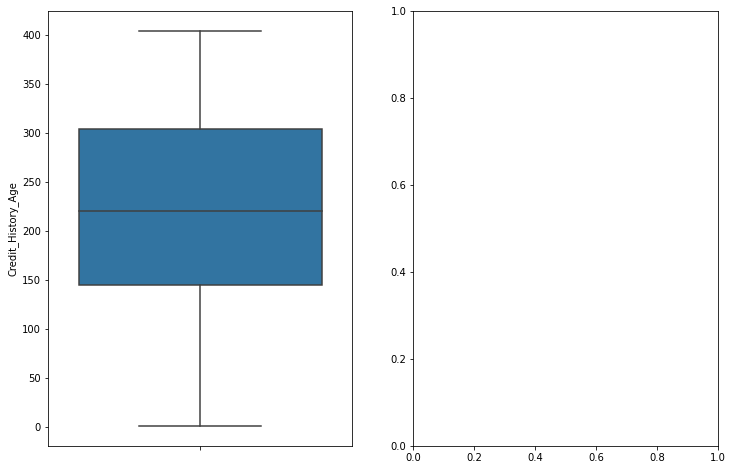

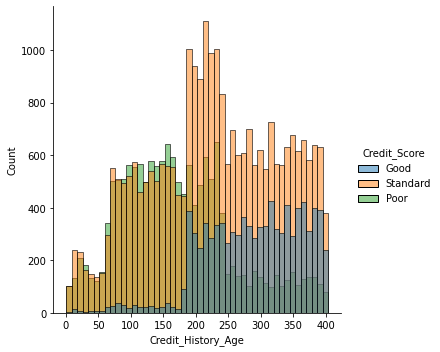

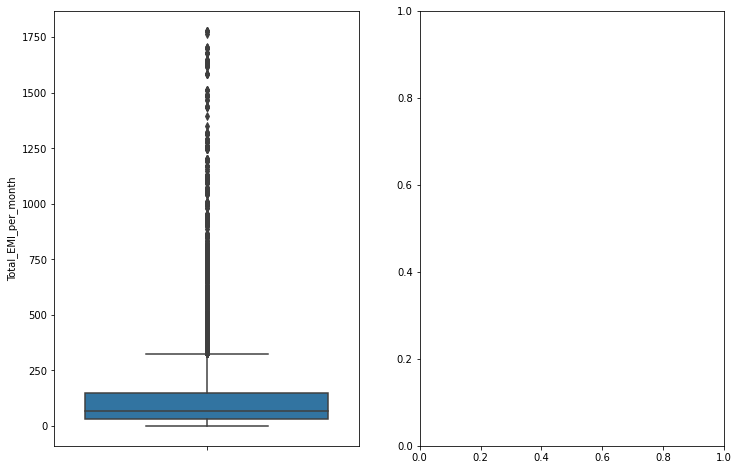

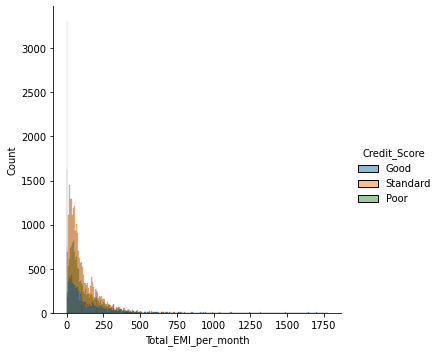

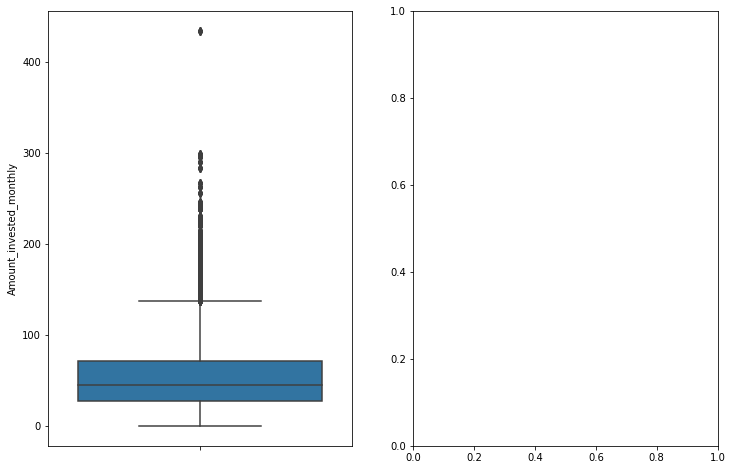

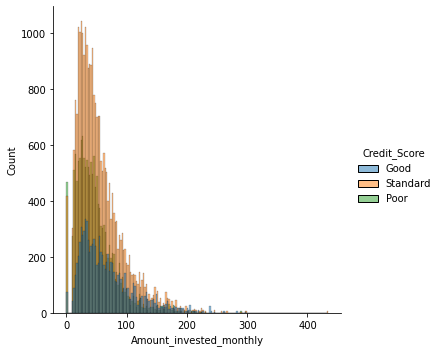

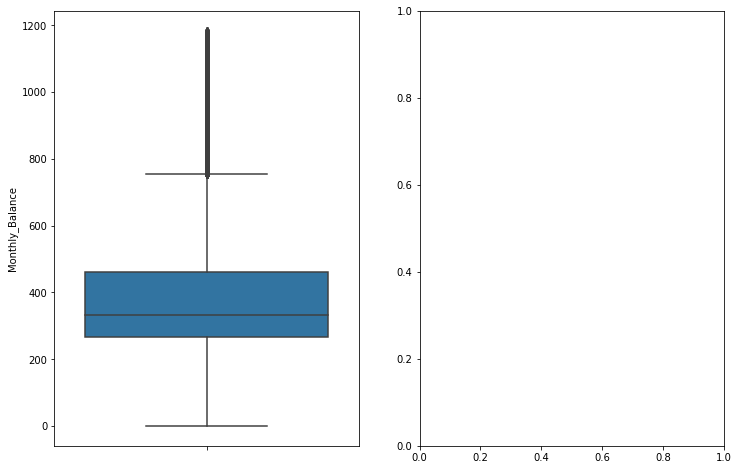

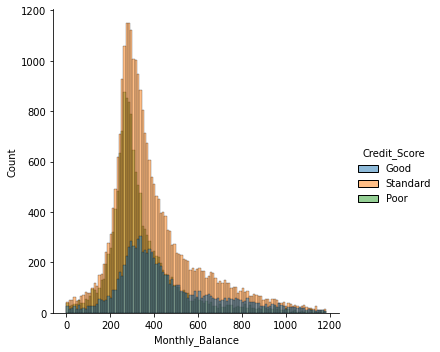

In [ ]:
numCols = source_data.select_dtypes([np.number]).columns
for col in numCols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=source_data, y=col, ax=ax[0])
    sns.displot(x=col,data=source_data, hue='Credit_Score')
    plt.show()

Although there are some outliers in categories such as monthly balance,amount invested monthly etc., overall there is no nonsense data and the distributions of these data over credit score is acceptable.

In [ ]:
#analysis categorical data to numerical
categorical = source_data.loc[:, source_data.dtypes==np.object]
categorical.columns

<ipython-input-14-b14fe9120337>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = source_data.loc[:, source_data.dtypes==np.object]


Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [ ]:
for col in categorical:
  print(categorical[col].value_counts())

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                        

We can see that Type of Loan is description text about loans the customer holds. Meanwhile, large amount of the data is not specified. We decide to drop this feature.

Numerical all categorical data

In [ ]:
#encode data and drop type_of_loan
source_data.drop(['Type_of_Loan'], axis=1, inplace = True)
df = source_data.copy()
categorical.drop(['Type_of_Loan'], axis=1, inplace = True)
for col in categorical:
  encoded = pd.get_dummies(df[col], prefix = col)
  df = pd.concat([df, encoded], axis = 1)
  df.drop([col], axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df.head(10)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,1,0,0,0,1,0,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,0,0,0,0,1,0,0,1,0,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,0,0,1,0,1,0,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0,0,0,0,0,0,1,1,0,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,0,0,1,0,0,0,0,1,0,0
5,6,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,4.0,...,0,0,1,0,0,0,0,1,0,0
6,7,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,...,0,0,0,0,0,0,1,1,0,0
7,8,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.0,...,0,0,1,0,0,0,0,0,0,1
8,1,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,...,0,0,0,0,0,0,1,0,0,1
9,2,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,1.0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int64  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  float64
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  float64
 8   Delay_from_due_date                                 100000 non-nu

Numerical credit score which is our y

In [ ]:
#modify credit score to single column
#use label encoding
credit_score_le = LabelEncoder()
df['Credit_Score'] = credit_score_le.fit_transform(source_data['Credit_Score'])
df.drop(['Credit_Score_Good','Credit_Score_Poor','Credit_Score_Standard'], axis= 1, inplace = True)

In [ ]:
df.head(10)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,1,0,0,0,1,0,0,0,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,0,1,0,0,0,0,1,0,0,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,1,0,0,0,0,0,1,0,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0,1,0,0,0,0,0,0,1,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,0,1,0,0,1,0,0,0,0,0
5,6,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,4.0,...,0,1,0,0,1,0,0,0,0,0
6,7,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,...,0,1,0,0,0,0,0,0,1,0
7,8,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.0,...,0,1,0,0,1,0,0,0,0,2
8,1,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,...,0,1,0,0,0,0,0,0,1,2
9,2,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,1.0,...,0,1,0,1,0,0,0,0,0,0


0 represent good, 2 represent standard, 1 represent poor

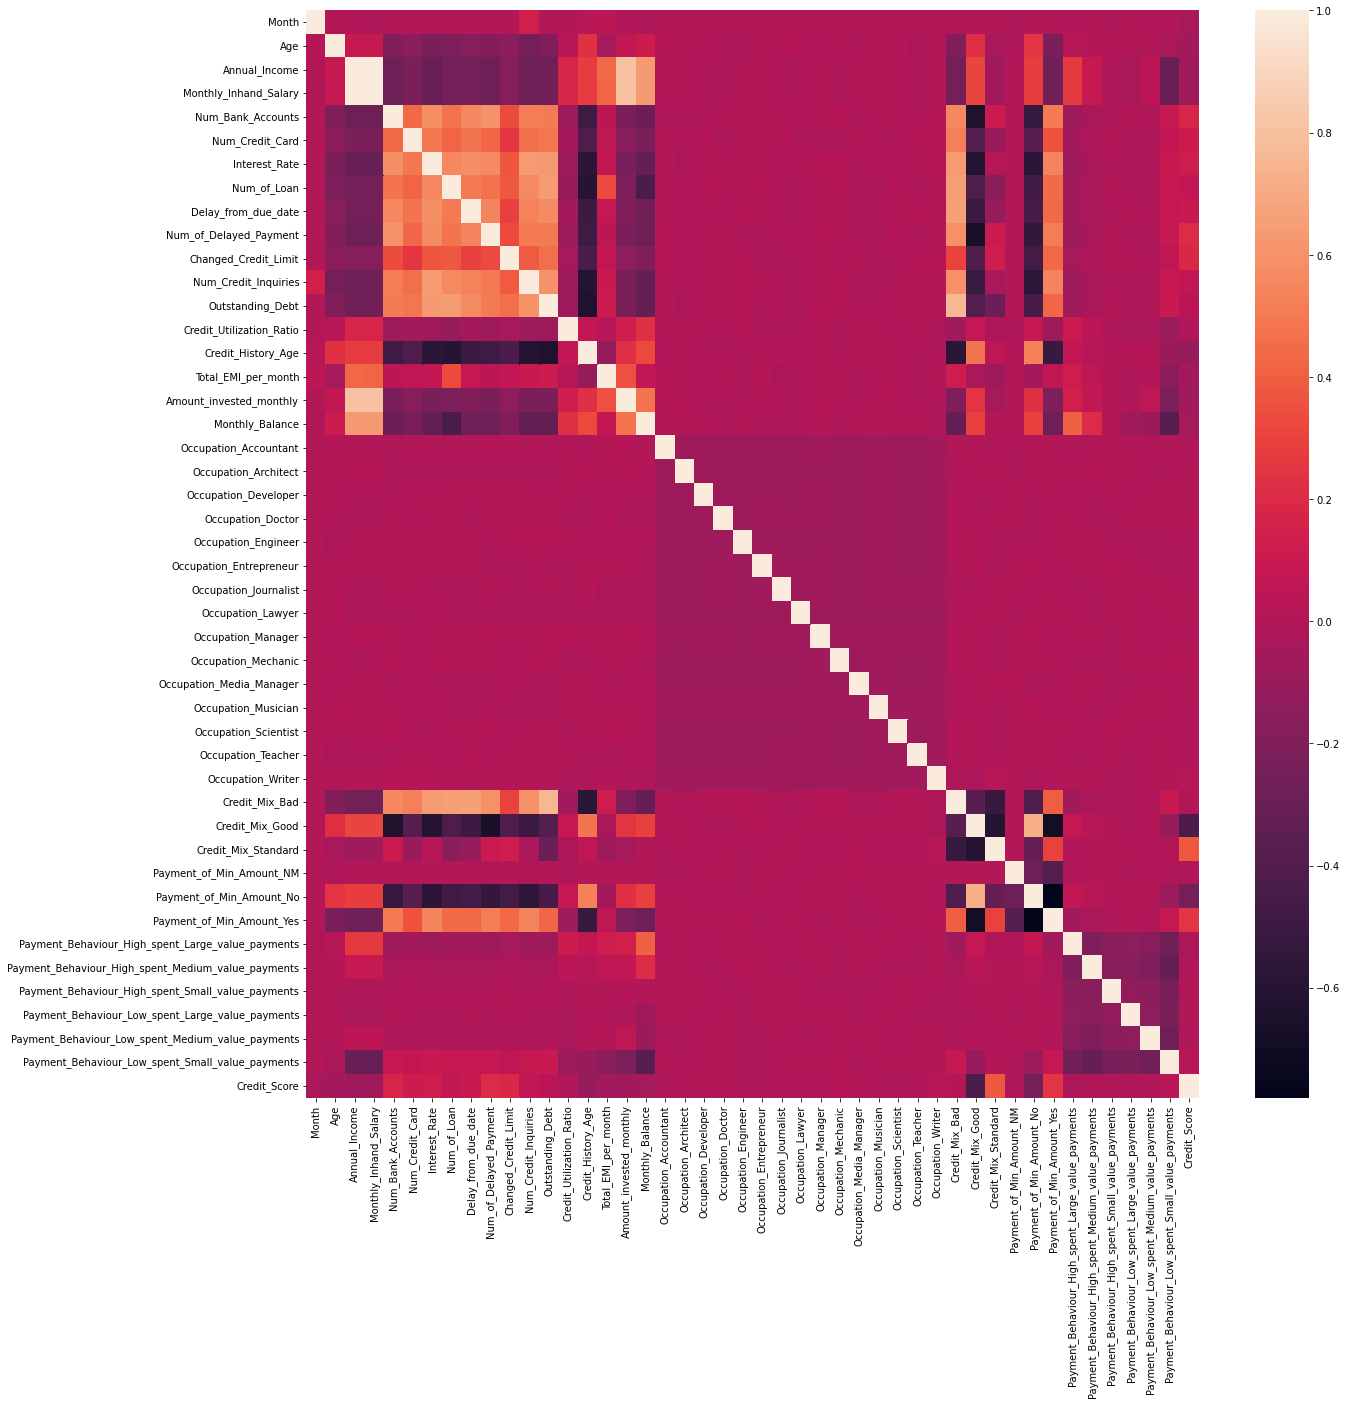

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

# Feature Selection

In [ ]:
X = df.drop(['Credit_Score'], axis = 1)
Y = df['Credit_Score']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int64  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  float64
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  float64
 8   Delay_from_due_date                                 100000 non-nu

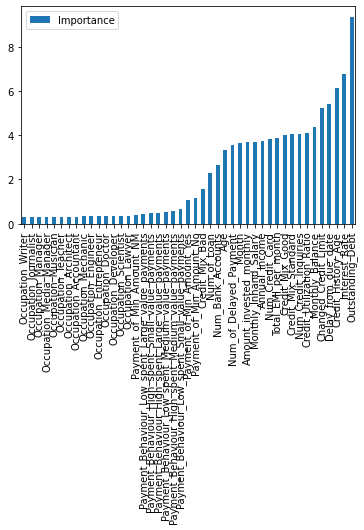

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 400)
model.fit(X,Y)
importance = model.feature_importances_

imp = pd.DataFrame(data = importance*100, columns = ['Importance'], index = X.columns)
imp = imp.sort_values('Importance')
imp.plot.bar()



,Importance
Occupation_Writer,0.300313
Occupation_Journalist,0.309711
Occupation_Manager,0.312167
Occupation_Media_Manager,0.315012
Occupation_Musician,0.317773
Occupation_Teacher,0.321084
Occupation_Architect,0.321830
Occupation_Accountant,0.323226
Occupation_Mechanic,0.325797
Occupation_Engineer,0.326333


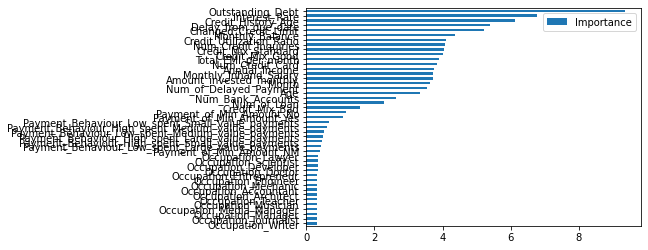

In [ ]:
imp.plot(kind='barh')
imp

We can see that all occupations and payment behaviours are not important in our random forest model. Therefore, we choose to drop all these features.

There is no significant important feature and because of the size of features, we choose to use all features.

In [ ]:
X.columns


Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_va

In [ ]:
X.drop(['Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer','Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'], axis = 1, inplace=True)

In [ ]:
X.head(10)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,265.0,49.574949,21.465380,312.494089,0,1,0,0,1,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,266.0,49.574949,21.465380,284.629162,0,1,0,0,1,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,267.0,49.574949,21.465380,331.209863,0,1,0,0,1,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,268.0,49.574949,21.465380,223.451310,0,1,0,0,1,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,269.0,49.574949,21.465380,341.489231,0,1,0,0,1,0
5,6,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,4.0,...,270.0,49.574949,21.465380,340.479212,0,1,0,0,1,0
6,7,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,8.0,...,271.0,49.574949,21.465380,244.565317,0,1,0,0,1,0
7,8,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,6.0,...,272.0,49.574949,21.465380,358.124168,0,1,0,0,1,0
8,1,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,4.0,...,319.0,18.816215,39.684018,470.690627,0,1,0,0,1,0
9,2,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,1.0,...,320.0,18.816215,39.684018,484.591214,0,1,0,0,1,0


# Sampling data and Model implementation

Try three sampling methods on base line model.
Oversample, undersample, SMOTE

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

Baseline model Logistic regression, do rebalance test on baseline model

*   Use F1 score as evaluation metric because of imbalance



In [ ]:
rebalancer = [RandomUnderSampler(random_state=0),RandomOverSampler(random_state=0), SMOTE()]
rebal_name = ['Undersampler', 'OverSampler', 'SMOTE']

In [ ]:


logit = LogisticRegression(max_iter=1000)
clf = logit.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Unbalanced')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

for index, sampler in enumerate(rebalancer):
    X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)
    clf_balanced = logit.fit(X_train_balanced, y_train_balanced)
    y_pred_bal = clf_balanced.predict(X_test)
    print(rebal_name[index])
    print(classification_report(y_test,y_pred_bal))
    print(accuracy_score(y_test, y_pred))




/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Unbalanced
              precision    recall  f1-score   support

           0       0.50      0.32      0.39      3527
           1       0.65      0.46      0.54      5874
           2       0.61      0.79      0.69     10599

    accuracy                           0.61     20000
   macro avg       0.59      0.52      0.54     20000
weighted avg       0.60      0.61      0.59     20000

0.60845


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Undersampler
              precision    recall  f1-score   support

           0       0.41      0.75      0.53      3527
           1       0.60      0.71      0.65      5874
           2       0.74      0.47      0.57     10599

    accuracy                           0.59     20000
   macro avg       0.59      0.64      0.58     20000
weighted avg       0.64      0.59      0.59     20000

0.60845


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


OverSampler
              precision    recall  f1-score   support

           0       0.42      0.75      0.53      3527
           1       0.61      0.68      0.64      5874
           2       0.73      0.49      0.59     10599

    accuracy                           0.59     20000
   macro avg       0.59      0.64      0.59     20000
weighted avg       0.64      0.59      0.60     20000

0.60845
SMOTE
              precision    recall  f1-score   support

           0       0.41      0.75      0.53      3527
           1       0.60      0.69      0.64      5874
           2       0.74      0.47      0.57     10599

    accuracy                           0.58     20000
   macro avg       0.58      0.64      0.58     20000
weighted avg       0.64      0.58      0.59     20000

0.60845


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#rebalance_comp(rebalancer)
#accus, accu_balanceds = np.round(rebalance_comp(rebalancer), 3)

In [ ]:
'''acc_table = pd.DataFrame({"Balancing Method": ['Undersample', 'Oversample','SMOTE'], 
                      "Accuracy (imbalanced)": accus, 
                      "Accuracy (balanced)": accu_balanceds})

pd.pivot_table(acc_table, index=['Balancing Method']).sort_values(by="Accuracy (balanced)", ascending=False)'''

'acc_table = pd.DataFrame({"Balancing Method": [\'Undersample\', \'Oversample\',\'SMOTE\'], \n                      "Accuracy (imbalanced)": accus, \n                      "Accuracy (balanced)": accu_balanceds})\n\npd.pivot_table(acc_table, index=[\'Balancing Method\']).sort_values(by="Accuracy (balanced)", ascending=False)'

## Tuning models



Decision Tree(no need to tune, this is final training model)

In [ ]:
dt = DecisionTreeClassifier(max_depth=12)
ddt_clf = dt.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Unbalanced')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

for index, sampler in enumerate(rebalancer):
    X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)
    clf_balanced = dt.fit(X_train_balanced, y_train_balanced)
    y_pred_bal = clf_balanced.predict(X_test)
    print(rebal_name[index])
    print(classification_report(y_test,y_pred_bal))
    print(accuracy_score(y_test, y_pred_bal))

Unbalanced
              precision    recall  f1-score   support

           0       0.41      0.75      0.53      3527
           1       0.60      0.69      0.64      5874
           2       0.74      0.47      0.57     10599

    accuracy                           0.58     20000
   macro avg       0.58      0.64      0.58     20000
weighted avg       0.64      0.58      0.59     20000

0.58435
Undersampler
              precision    recall  f1-score   support

           0       0.55      0.84      0.66      3527
           1       0.65      0.81      0.72      5874
           2       0.86      0.59      0.70     10599

    accuracy                           0.70     20000
   macro avg       0.69      0.75      0.69     20000
weighted avg       0.74      0.70      0.70     20000

0.69885
OverSampler
              precision    recall  f1-score   support

           0       0.55      0.84      0.66      3527
           1       0.65      0.81      0.72      5874
           2       0.86

Randome forest kfold tuning

In [ ]:
rf_par= {'n_estimators': [100, 200, 400, 800],
           'max_features': ['auto', 'sqrt', 'log2'],
           'min_samples_split': [2, 5, 10, 20]}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, rf_par, cv=10, n_jobs=-1, verbose=2)
rf_cv.fit(X_train[:5000], y_train[:5000])
print("Best paramters combination of Random Forest: {}".format(rf_cv.best_params_))

NameError: ignored

Don't use svm since tuning time too long(more than 10 hours).

Neural Network Tuning

In [ ]:
nn_par = {'alpha': [1, 0.1, 0.01, 0.001],
           'hidden_layer_sizes': [(48,48,48), (120,120)],
           'solver': ["adam", "sgd"],
           'activation': ["logistic", "relu"]}

nn = MLPClassifier()
nn_cv = GridSearchCV(nn, nn_par, cv=10, n_jobs=-1, verbose=2)
nn_cv.fit(X_train[:5000], y_train[:5000])
print("Best paramters combination of Neural Network: {}".format(nn_cv.best_params_))

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best paramters (NN): {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (48, 48, 48), 'solver': 'adam'}


XGBoost, Adaboost, soft voting

## Implement models

Decision Tree has been implemented above

XGBoost

In [ ]:
xgb = XGBClassifier()
xgb_clf = xgb.fit(X_train, y_train)
X_test_bal, y_test_bal= SMOTE().fit_resample(X_test, y_test)
y_pred = xgb.predict(X_test_bal)
print('Unbalanced')
print(classification_report(y_test_bal, y_pred))
print(accuracy_score(y_test_bal, y_pred))
for index, sampler in enumerate(rebalancer):
    X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)
    clf_balanced = xgb.fit(X_train_balanced, y_train_balanced)
    y_pred_bal = clf_balanced.predict(X_test_bal)
    print(rebal_name[index])
    print(classification_report(y_test_bal,y_pred_bal))
    print(accuracy_score(y_test_bal, y_pred_bal))

Unbalanced
              precision    recall  f1-score   support

           0       0.78      0.68      0.73     10599
           1       0.83      0.65      0.73     10599
           2       0.56      0.75      0.64     10599

    accuracy                           0.70     31797
   macro avg       0.72      0.70      0.70     31797
weighted avg       0.72      0.70      0.70     31797

0.6956631128722836
Undersampler
              precision    recall  f1-score   support

           0       0.72      0.83      0.77     10599
           1       0.75      0.78      0.77     10599
           2       0.70      0.58      0.63     10599

    accuracy                           0.73     31797
   macro avg       0.72      0.73      0.72     31797
weighted avg       0.72      0.73      0.72     31797

0.726766676101519
OverSampler
              precision    recall  f1-score   support

           0       0.73      0.83      0.78     10599
           1       0.75      0.78      0.77     10599
  

ADAboost

In [ ]:
ada = AdaBoostClassifier(n_estimators = 800)
ada_clf = ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print('Unbalanced')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
for index, sampler in enumerate(rebalancer):
    X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)
    clf_balanced = ada.fit(X_train_balanced, y_train_balanced)
    y_pred_bal = clf_balanced.predict(X_test)
    print(rebal_name[index])
    print(classification_report(y_test,y_pred_bal))
    print(accuracy_score(y_test, y_pred_bal))

Unbalanced
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      3527
           1       0.67      0.59      0.63      5874
           2       0.70      0.73      0.71     10599

    accuracy                           0.66     20000
   macro avg       0.64      0.63      0.64     20000
weighted avg       0.66      0.66      0.66     20000

0.6641
Undersampler
              precision    recall  f1-score   support

           0       0.51      0.82      0.63      3527
           1       0.64      0.70      0.67      5874
           2       0.81      0.60      0.69     10599

    accuracy                           0.67     20000
   macro avg       0.65      0.71      0.66     20000
weighted avg       0.71      0.67      0.67     20000

0.6705
OverSampler
              precision    recall  f1-score   support

           0       0.51      0.82      0.63      3527
           1       0.64      0.71      0.67      5874
           2       0.82  

Random forest

In [ ]:
rf = RandomForestClassifier(max_features='sqrt', min_samples_split=2, n_estimators=200)
rf_clf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Unbalanced')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
for index, sampler in enumerate(rebalancer):
    X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)
    clf_balanced = rf.fit(X_train_balanced, y_train_balanced)
    y_pred_bal = clf_balanced.predict(X_test)
    print(rebal_name[index])
    print(classification_report(y_test,y_pred_bal))
    print(accuracy_score(y_test, y_pred_bal))

Unbalanced
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      3527
           1       0.81      0.86      0.84      5874
           2       0.86      0.83      0.84     10599

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.84      0.83      0.84     20000

0.83495
Undersampler
              precision    recall  f1-score   support

           0       0.64      0.92      0.75      3527
           1       0.76      0.87      0.81      5874
           2       0.91      0.70      0.79     10599

    accuracy                           0.79     20000
   macro avg       0.77      0.83      0.79     20000
weighted avg       0.82      0.79      0.79     20000

0.789
OverSampler
              precision    recall  f1-score   support

           0       0.78      0.87      0.83      3527
           1       0.81      0.89      0.85      5874
           2       0.89  

Neural Network

In [ ]:
#standardlize
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)
nn = MLPClassifier(alpha=0.01, hidden_layer_sizes=(48,48,48), activation = 'logistic', solver = 'adam')
nn_clf = nn.fit(X_train_standard, y_train)
y_pred = nn.predict(X_test_standard)
print('Unbalanced')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
for index, sampler in enumerate(rebalancer):
    X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)
    X_train_standard_b = scaler.transform(X_train_balanced)
    clf_balanced = nn.fit(X_train_standard_b, y_train_balanced)
    y_pred_bal = clf_balanced.predict(X_test_standard)
    print(rebal_name[index])
    print(classification_report(y_test,y_pred_bal))
    print(accuracy_score(y_test, y_pred_bal))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Unbalanced
              precision    recall  f1-score   support

           0       0.58      0.73      0.64      3527
           1       0.74      0.66      0.70      5874
           2       0.76      0.74      0.75     10599

    accuracy                           0.71     20000
   macro avg       0.69      0.71      0.70     20000
weighted avg       0.72      0.71      0.71     20000

0.7133


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Undersampler
              precision    recall  f1-score   support

           0       0.52      0.84      0.65      3527
           1       0.65      0.76      0.70      5874
           2       0.85      0.59      0.70     10599

    accuracy                           0.69     20000
   macro avg       0.67      0.73      0.68     20000
weighted avg       0.73      0.69      0.69     20000

0.68715
OverSampler
              precision    recall  f1-score   support

           0       0.52      0.85      0.64      3527
           1       0.63      0.81      0.71      5874
           2       0.87      0.55      0.67     10599

    accuracy                           0.68     20000
   macro avg       0.67      0.73      0.67     20000
weighted avg       0.74      0.68      0.68     20000

0.67615
SMOTE
              precision    recall  f1-score   support

           0       0.53      0.83      0.65      3527
           1       0.69      0.71      0.70      5874
           2       0.81     

Soft voting

In [ ]:
sv = VotingClassifier(estimators=[('DT', ddt_clf), ('XGboost',xgb_clf),('RandomF',rf_clf),('NeuralN',nn_clf)], voting='soft',weights=[1,1,2,2])
sv_clf = sv.fit(X_train, y_train)
y_pred = sv_clf.predict(X_test)
print('Unbalanced')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Unbalanced
              precision    recall  f1-score   support

           0       0.83      0.61      0.70      3527
           1       0.79      0.78      0.79      5874
           2       0.77      0.85      0.81     10599

    accuracy                           0.79     20000
   macro avg       0.80      0.74      0.76     20000
weighted avg       0.79      0.79      0.78     20000

0.7853
